In [26]:
#!pip install pulp

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import pulp
import matplotlib.colors as mcolors

class SchoolMealDeliveryOptimizer:
    def __init__(self, grid_size=15, num_points=20, num_vehicles=9, vehicle_capacity=30, delivery_time_limit=120 * 2, p = 0.0, speed = 40):
        self.grid_size = grid_size
        self.num_points = num_points
        self.num_vehicles = num_vehicles
        self.vehicle_capacity = vehicle_capacity
        self.delivery_time_limit = delivery_time_limit
        self.locations = None
        self.w_i = None
        self.d_ij = None
        self.t_ij = None
        self.g_ij = None
        self.p = p
        self.speed = speed #km/h

    def generate_data(self):
        np.random.seed(None)  # Resetting seed
        self.locations = np.random.rand(self.num_points, 2) * self.grid_size
        self.w_i = np.maximum(np.random.normal(10, 2, self.num_points), 0)
        self.w_i[0] = 0  # Setting depot weight to 0

        # Compute distances and times
        self.d_ij = np.zeros((self.num_points, self.num_points))
        self.t_ij = np.zeros((self.num_points, self.num_points))
        for i in range(self.num_points):
            for j in range(self.num_points):
                self.d_ij[i][j] = np.linalg.norm(self.locations[i] - self.locations[j])
                self.t_ij[i][j] = self.d_ij[i][j] / self.speed * 60  # Convert to time in minutes

        self.g_ij = np.random.normal(0, 2, (self.num_points, self.num_points))

    def plot_delivery_points(self, filename='deliverry_points.png'):
      # Calculating averages and standard deviations
      avg_distance = np.mean(self.d_ij[np.triu_indices(self.num_points, k=1)])
      std_distance = np.std(self.d_ij[np.triu_indices(self.num_points, k=1)])
      avg_time = np.mean(self.t_ij[np.triu_indices(self.num_points, k=1)])
      std_time = np.std(self.t_ij[np.triu_indices(self.num_points, k=1)])
      avg_gradient = np.mean(self.g_ij[np.triu_indices(self.num_points, k=1)])
      std_gradient = np.std(self.g_ij[np.triu_indices(self.num_points, k=1)])

      # Plotting the delivery points and depot
      fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

      # Plotting Delivery Points and Depot
      scatter = ax[0, 0].scatter(self.locations[1:, 0], self.locations[1:, 1], c=self.w_i[1:], cmap='Blues', s=100 * self.w_i[1:], alpha=0.6, marker='o', edgecolors='black')
      ax[0, 0].scatter(self.locations[0, 0], self.locations[0, 1], c='red', s=250, marker='*', edgecolors='black', zorder=5)
      for i, coord in enumerate(self.locations):
          ax[0, 0].annotate(str(i), (coord[0], coord[1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10)
      ax[0, 0].set_xlabel('X-coordinate')
      ax[0, 0].set_ylabel('Y-coordinate')
      ax[0, 0].set_title('Delivery Points and Depot with Size Based on w_i')
      ax[0, 0].grid(True)
      ax[0, 0].set_xlim(0, self.grid_size)
      ax[0, 0].set_ylim(0, self.grid_size)

      # Distance Histogram
      ax[0, 1].hist(self.d_ij[np.triu_indices(self.num_points, k=1)], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
      ax[0, 1].set_title(f'Histogram of Distances\nMean: {avg_distance:.2f} km, Std: {std_distance:.2f} km')
      ax[0, 1].set_xlabel('Distance (km)')
      ax[0, 1].set_ylabel('Frequency')
      ax[0, 1].grid(True, which='both', linestyle='--', linewidth=0.5)

      # Travel Time Histogram
      ax[1, 0].hist(self.t_ij[np.triu_indices(self.num_points, k=1)], bins=20, color='salmon', edgecolor='black', alpha=0.7)
      ax[1, 0].set_title(f'Histogram of Travel Times\nMean: {avg_time:.2f} mins, Std: {std_time:.2f} mins')
      ax[1, 0].set_xlabel('Travel Time (minutes)')
      ax[1, 0].set_ylabel('Frequency')
      ax[1, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

      # Gradient Histogram
      ax[1, 1].hist(self.g_ij[np.triu_indices(self.num_points, k=1)], bins=20, color='mediumseagreen', edgecolor='black', alpha=0.7)
      ax[1, 1].set_title(f'Histogram of Gradients\nMean: {avg_gradient:.2f}, Std: {std_gradient:.2f}')
      ax[1, 1].set_xlabel('Gradient')
      ax[1, 1].set_ylabel('Frequency')
      ax[1, 1].grid(True, which='both', linestyle='--', linewidth=0.5)

      plt.tight_layout()
      plt.show()

    def dataframe_and_save(self, filename_prefix):
        # w_i to DataFrame and save
        df_wi = pd.DataFrame(self.w_i, columns=['w_i'])
        print("\nWeights (w_i):")
        print(df_wi)
#        df_wi.to_csv(f"{filename_prefix}_wi.csv", index=False)

        # d_ij to DataFrame and save
        df_dij = pd.DataFrame(self.d_ij, columns=[f"Point_{j}" for j in range(self.num_points)])
        print("\nDistances (d_ij):")
        print(df_dij)
#        df_dij.to_csv(f"{filename_prefix}_dij.csv", index=False)

        # t_ij to DataFrame and save
        df_tij = pd.DataFrame(self.t_ij, columns=[f"Point_{j}" for j in range(self.num_points)])
        print("\nTravel Times (t_ij):")
        print(df_tij)
#        df_tij.to_csv(f"{filename_prefix}_tij.csv", index=False)

        # g_ij to DataFrame and save
        df_gij = pd.DataFrame(self.g_ij, columns=[f"Point_{j}" for j in range(self.num_points)])
        print("\nGradients (g_ij):")
        print(df_gij)
#        df_gij.to_csv(f"{filename_prefix}_gij.csv", index=False)

    def optimize(self):
        model = pulp.LpProblem("SchoolMealDelivery", pulp.LpMinimize)
        x = pulp.LpVariable.dicts("x", (range(self.num_points), range(self.num_points), range(self.num_vehicles)), cat='Binary')
        model += pulp.lpSum(self.d_ij[i][j] * x[i][j][q] * (1 + self.g_ij[i][j] * self.p)
                            for i in range(self.num_points)
                            for j in range(self.num_points)
                            for q in range(self.num_vehicles))
        for q in range(self.num_vehicles):
            for i in range(self.num_points):
                model += pulp.lpSum(self.w_i[j] * x[i][j][q] for j in range(self.num_points)) <= self.vehicle_capacity
            model += pulp.lpSum(self.t_ij[i][j] * x[i][j][q] for i in range(self.num_points) for j in range(self.num_points)) <= self.delivery_time_limit
        for j in range(1, self.num_points):
            model += pulp.lpSum(x[i][j][q] for i in range(self.num_points) for q in range(self.num_vehicles)) == 1
        for i in range(1, self.num_points):
            model += pulp.lpSum(x[i][j][q] for j in range(self.num_points) for q in range(self.num_vehicles)) == 1
        for q in range(self.num_vehicles):
            model += pulp.lpSum(x[0][j][q] for j in range(1, self.num_points)) == 1
            model += pulp.lpSum(x[i][0][q] for i in range(1, self.num_points)) == 1
        model.solve()
        self.model = model
        self.x = x

    def display_results(self, filename="optimized_routes.png"):
        print(f"Optimal Objective Value: {self.model.objective.value()}")
        for q in range(self.num_vehicles):
            #route = [i for i in range(self.num_points) for j in range(self.num_points) if self.x[i][j][q].varValue > 0.5]
            route = [i for i in range(self.num_points) for j in range(self.num_points) if self.x[i][j][q].varValue is not None and self.x[i][j][q].varValue > 0.5]
            print(f"Vehicle {q} Route: {route}")

        # Plot the routes
        plt.figure(figsize=(8, 8))
        for q in range(self.num_vehicles):
            for i in range(self.num_points):
                for j in range(self.num_points):
                    #if self.x[i][j][q].varValue > 0.5:
                    if self.x[i][j][q].varValue is not None and self.x[i][j][q].varValue > 0.5:
                        plt.plot([self.locations[i][0], self.locations[j][0]],
                                 [self.locations[i][1], self.locations[j][1]], marker='o')
        plt.xlim(0, self.grid_size)
        plt.ylim(0, self.grid_size)
        plt.title("Optimized Delivery Routes")
        plt.xlabel("X-coordinate")
        plt.ylabel("Y-coordinate")
        plt.grid(True)
        #plt.savefig(filename, format='png')
        plt.show()


    def display_results2_modified(self, optimizer, filename="optimized_routes.png"):
        print(f"Optimal Objective Value: {optimizer.model.objective.value()}\n")

        total_distance_travelled = 0
        total_time_taken = 0
        total_gradient = 0

        schedules = []

        colors = list(mcolors.TABLEAU_COLORS.values())  # Use tableau colors for distinction

        for q in range(optimizer.num_vehicles):
            route = [i for i in range(optimizer.num_points) for j in range(optimizer.num_points) if optimizer.x[i][j][q].varValue is not None and optimizer.x[i][j][q].varValue > 0.5]
            route_distance = sum(optimizer.d_ij[route[i]][route[i+1]] for i in range(len(route)-1))
            route_time = sum(optimizer.t_ij[route[i]][route[i+1]] for i in range(len(route)-1))
            route_gradient = sum(optimizer.g_ij[route[i]][route[i+1]] for i in range(len(route)-1))

            total_distance_travelled += route_distance
            total_time_taken += route_time
            total_gradient += route_gradient

            print(f"Vehicle {q}")
            print(f"Route: {route}")
            print(f"Total Distance Travelled: {route_distance:.2f} km")
            print(f"Total Time Taken: {route_time:.2f} mins")
            print(f"Total Gradient: {route_gradient:.2f}\n")

            # Gantt chart scheduling
            schedule = []
            start_time = 0
            for i in range(len(route)-1):
                end_time = start_time + optimizer.t_ij[route[i]][route[i+1]]
                schedule.append((start_time, end_time - start_time, colors[route[i+1] % len(colors)]))  # Store color as well
                start_time = end_time
            schedules.append(schedule)

        # Plot the routes
        plt.figure(figsize=(8, 8))
        for q in range(optimizer.num_vehicles):
            for i in range(optimizer.num_points):
                for j in range(optimizer.num_points):
                    if optimizer.x[i][j][q].varValue is not None and optimizer.x[i][j][q].varValue > 0.5:
                        plt.plot([optimizer.locations[i][0], optimizer.locations[j][0]],
                                [optimizer.locations[i][1], optimizer.locations[j][1]], marker='o')
        plt.xlim(0, optimizer.grid_size)
        plt.ylim(0, optimizer.grid_size)
        plt.title("Optimized Delivery Routes")
        plt.xlabel("X-coordinate")
        plt.ylabel("Y-coordinate")
        plt.grid(True)
        plt.savefig(filename, format='png')
        plt.show()

        print(f"Overall Total Distance Travelled by all Vehicles: {total_distance_travelled:.2f} km")
        print(f"Overall Total Time Taken by all Vehicles: {total_time_taken:.2f} mins")
        print(f"Overall Total Gradient faced by all Vehicles: {total_gradient:.2f}")

        # Gantt chart
        fig, gnt = plt.subplots(figsize=(10, 6))
        gnt.set_ylim(0, optimizer.num_vehicles * 10)
        gnt.set_xlim(0, max(schedule[-1][0] + schedule[-1][1] for schedule in schedules) + 10)
        gnt.set_xlabel('Minutes since start')
        gnt.set_ylabel('Vehicle')
        gnt.set_yticks([5 + 10 * q for q in range(optimizer.num_vehicles)])
        gnt.set_yticklabels(['Vehicle ' + str(q) for q in range(optimizer.num_vehicles)])
        gnt.grid(True)

        for q, schedule in enumerate(schedules):
            for event in schedule:
                gnt.broken_barh([(event[0], event[1])], (10 * q, 9), facecolors=event[2])

        plt.title("Gantt Chart of Vehicle Schedules")
        plt.tight_layout()
        plt.show()

        for q in range(optimizer.num_vehicles):
            for i in range(optimizer.num_points):
                for j in range(optimizer.num_points):
                    if optimizer.x[i][j][q].varValue is not None and optimizer.x[i][j][q].varValue > 0.5:
                        print(i,j,q,optimizer.x[i][j][q].varValue)

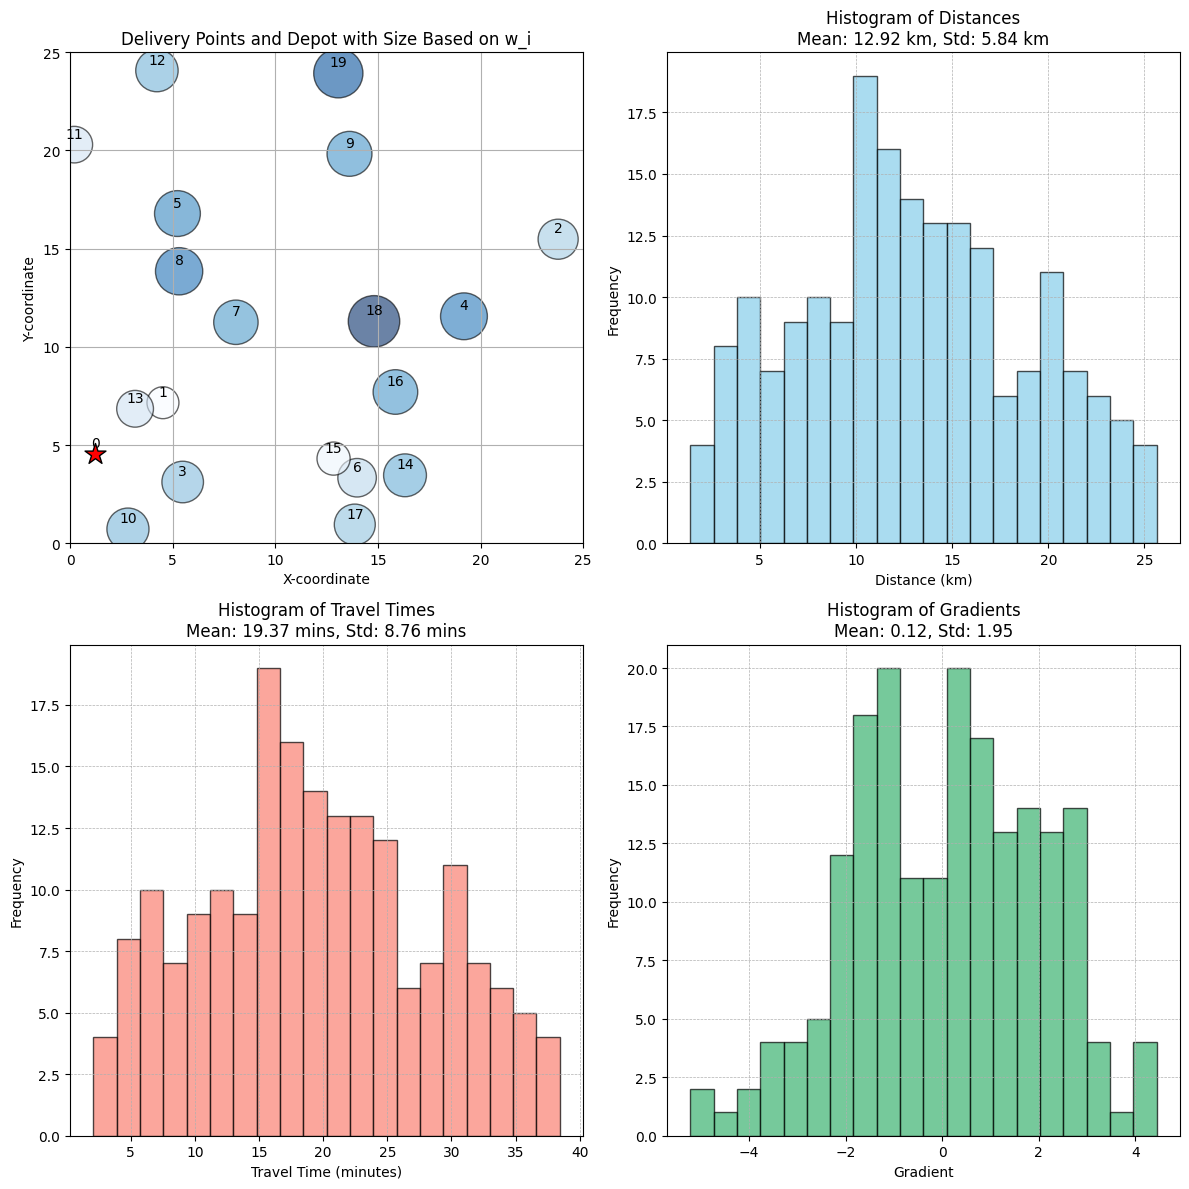


Weights (w_i):
          w_i
0    0.000000
1    5.294815
2    8.326944
3    8.963382
4   11.373756
5   10.899055
6    7.693068
7   10.229604
8   11.587164
9   10.464294
10   9.191717
11   6.932441
12   9.324964
13   7.004248
14   9.522208
15   5.690524
16  10.319065
17   8.704908
18  13.736178
19  12.564147

Distances (d_ij):
      Point_0    Point_1    Point_2    Point_3    Point_4    Point_5  \
0    0.000000   4.200155  25.063095   4.509683  19.285155  12.859525   
1    4.200155   0.000000  20.976975   4.149942  15.312046   9.655152   
2   25.063095  20.976975   0.000000  22.077474   6.037288  18.594713   
3    4.509683   4.149942  22.077474   0.000000  16.093236  13.668611   
4   19.285155  15.312046   6.037288  16.093236   0.000000  14.907243   
5   12.859525   9.655152  18.594713  13.668611  14.907243   0.000000   
6   12.827656  10.201815  15.601080   8.500737   9.729751  16.046667   
7    9.578451   5.421981  16.260292   8.534702  11.116177   6.224520   
8   10.142080   6.73695

In [28]:
optimizer = SchoolMealDeliveryOptimizer(grid_size=25)
optimizer.generate_data()
optimizer.plot_delivery_points()
optimizer.dataframe_and_save('SchoolMealDelivery')

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/haruharukaka/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/7g/qysd_9w90fzdq95qwxxv2zrh0000gp/T/ee907be4e5d3467aae4f9e0f2dd0c985-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/7g/qysd_9w90fzdq95qwxxv2zrh0000gp/T/ee907be4e5d3467aae4f9e0f2dd0c985-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 250 COLUMNS
At line 24875 RHS
At line 25121 BOUNDS
At line 28713 ENDATA
Problem MODEL has 245 rows, 3591 columns and 14022 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 145.818 - 0.00 seconds
Cgl0004I processed model has 245 rows, 3591 columns (3591 integer (3591 of which binary)) and 14022 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 6.66134e-16
Cbc0038I Solution found of 145.818
Cbc0038I Before mini br

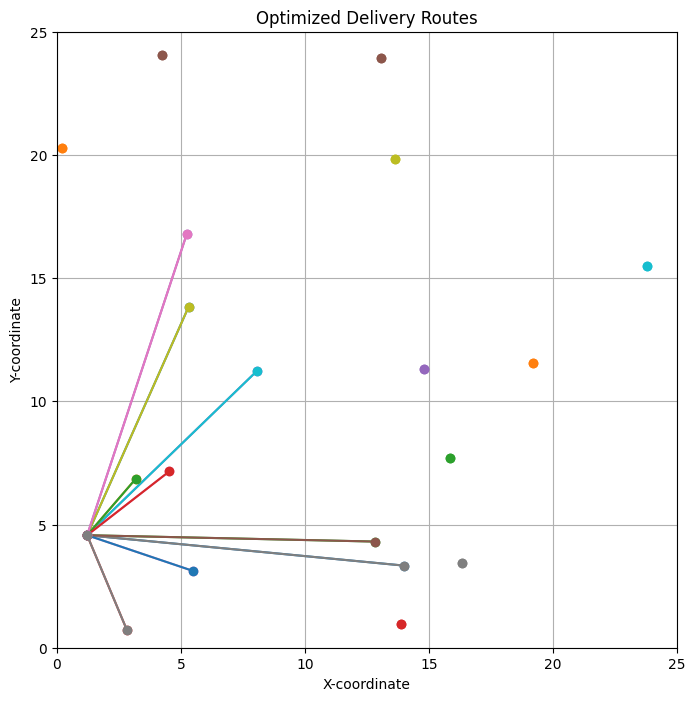

Overall Total Distance Travelled by all Vehicles: 231.40 km
Overall Total Time Taken by all Vehicles: 347.10 mins
Overall Total Gradient faced by all Vehicles: 10.29


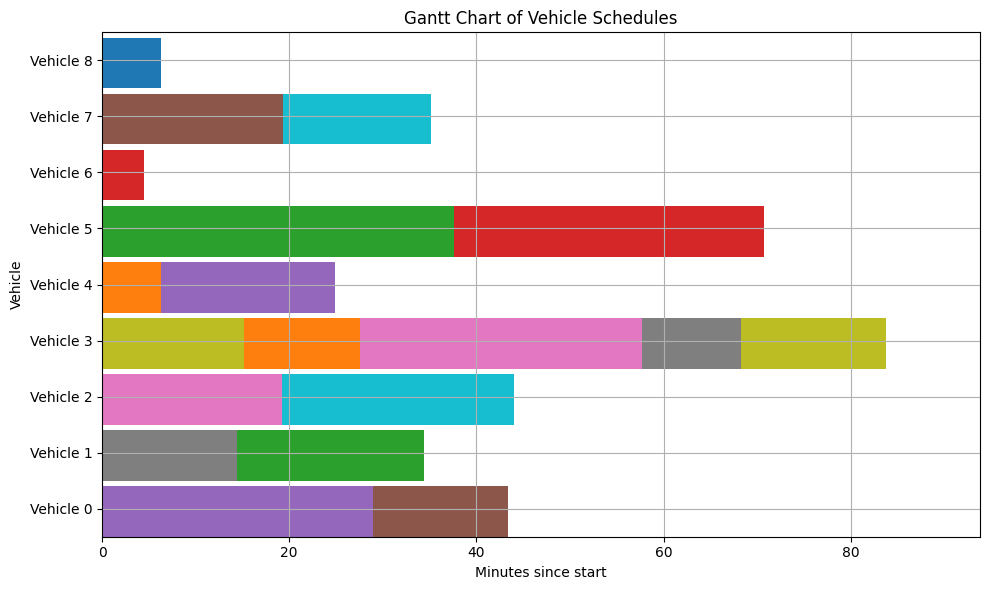

0 6 0 1.0
4 4 0 1.0
15 0 0 1.0
0 10 1 1.0
7 0 1 1.0
12 12 1 1.0
0 3 2 1.0
6 0 2 1.0
9 9 2 1.0
0 7 3 1.0
8 0 3 1.0
11 11 3 1.0
16 16 3 1.0
17 17 3 1.0
18 18 3 1.0
0 15 4 1.0
1 0 4 1.0
14 14 4 1.0
0 8 5 1.0
2 2 5 1.0
3 0 5 1.0
0 13 6 1.0
13 0 6 1.0
0 1 7 1.0
5 0 7 1.0
19 19 7 1.0
0 5 8 1.0
10 0 8 1.0


In [29]:
optimizer.optimize() # Commented out as we can't run pulp here.
optimizer.display_results2_modified(optimizer)